# importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

# Para renderizar tablas

In [554]:
import six

In [573]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

# Importar y reacomodar datasets

Los datasets provienen del GCBA https://data.buenosaires.gob.ar/dataset/set-filmaciones

In [2]:
# Dataset permisos 2019 
film_19 = pd.read_csv('./datasets/baset-2019.csv')

In [3]:
# Checkear dataset
film_19.head()

,long,lat,trimestre,titulo,razon_social,tipo_produccion,fecha,calle,altura,barrio,comuna,codigo_postal,codigo_postal_argentino
0,-58.450608,-34.583259,3 TRIMESTRE 2019,Cadaver Exquisito,Nicolás Münzel Camaño,Largometraje con I.N.C.A.A.,2019-07-01,CHARLONE,428,Chacarita,Comuna 15,1427.0,C1427BXJ
1,-58.389331,-34.594660,3 TRIMESTRE 2019,UNA HABITACION SIMPLE,Fundación del Cine,Estudiantes,2019-07-01,ARENALES,1501,Recoleta,Comuna 2,1061.0,C1061AAQ
2,-58.428856,-34.645080,3 TRIMESTRE 2019,Entre Hombres,Pol-ka Producciones S.A.,Programa Televisivo,2019-07-01,RIESTRA AV.,1400,Nueva Pompeya,Comuna 4,1437.0,C1437HIP
3,-58.526679,-34.625486,3 TRIMESTRE 2019,Entre Hombres,Pol-ka Producciones S.A.,Programa Televisivo,2019-07-01,NOGOYA,6100,Versalles,Comuna 10,1408.0,C1408BBP
4,-58.411583,-34.557400,3 TRIMESTRE 2019,UNA HABITACION SIMPLE,Fundación del Cine,Estudiantes,2019-07-01,"OBLIGADO RAFAEL, AV.COSTANERA",4250,Palermo,Comuna 14,NaN,NaN


In [4]:
# Dataset histórico
film_hist = pd.read_csv('./datasets/baset-historico.csv')

In [5]:
# Checkear dataset
film_hist.tail()

,long,lat,periodo,titulo_proyecto,productora_razon_social,tipo_produccion,fecha_rodaje,direccion,calle,altura,barrio,comuna,codigo_postal,codigo_postal_argentino
17425,-58.370890,-34.627371,2 TRIMESTRE 2019,Panik,Escine S.A.,Cortometraje,2019-06-29,NaN,DEFENSA,1650,Barracas,Comuna 4,1143.0,C1143AAJ
17426,-58.470893,-34.587310,2 TRIMESTRE 2019,Panik,Escine S.A.,Cortometraje,2019-06-29,NaN,COMBATIENTES DE MALVINAS AV.,3002,Parque Chas,Comuna 15,1431.0,C1431FTA
17427,-58.366028,-34.627784,2 TRIMESTRE 2019,Panik,Escine S.A.,Cortometraje,2019-06-29,NaN,PI Y MARGALL,750,Boca,Comuna 4,1155.0,C1155AHD
17428,-58.444209,-34.575744,2 TRIMESTRE 2019,La estrella roja,Gabriel Matias Lichtmann,Largometraje Nacional,2019-06-30,NaN,"NEWBERY, JORGE",2818,Colegiales,Comuna 13,1426.0,C1426CYB
17429,-58.377741,-34.609054,2 TRIMESTRE 2019,La estrella roja,Gabriel Matias Lichtmann,Largometraje Nacional,2019-06-30,NaN,PIEDRAS,78,Monserrat,Comuna 1,1070.0,C1070AAB


In [265]:
# Ver como son las columnas para poder unificar
#film_19.columns
#film_hist.columns

In [6]:
# Generar columna direccion a partir de calle y altura (direccion de fil_hist tiene problemas, va a ser reemplazada)
film_19['direccion_'] = film_19['calle'] + ' ' + film_19['altura'].map(str)
film_hist['direccion_'] = film_hist['calle'] + ' ' + film_hist['altura'].map(str)

In [7]:
# Renombrar columnas para poder unificar
film_19 = film_19[['long', 'lat', 'titulo', 'razon_social', 'tipo_produccion', 'fecha', 'barrio', 'comuna', 
                  'codigo_postal', 'codigo_postal_argentino', 'direccion_']]
film_hist = film_hist[['long', 'lat', 'titulo_proyecto', 'productora_razon_social', 'tipo_produccion', 
                       'fecha_rodaje', 'barrio', 'comuna', 'codigo_postal', 'codigo_postal_argentino', 'direccion_']]

In [8]:
# Renombrar columnas para poder unificar
film_hist.columns = film_19.columns

In [266]:
# Checkear dataframe
#film_19.head()

In [9]:
# Concatenar en un unico dataframe
film = pd.concat([film_hist, film_19], ignore_index= True)

In [239]:
# Pasar todas las columnas a upper para evitar duplicados
film.titulo = film.titulo.str.upper()
film.razon_social = film.razon_social.str.upper()
film.tipo_produccion = film.tipo_produccion.str.upper()
film.barrio = film.barrio.str.upper()
film.comuna = film.comuna.str.upper()
film.direccion_ = film.direccion_.str.upper()

In [241]:
# Normalizar columnas de strings que voy a utilizar sacando acentos
film.titulo = film.titulo.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
film.razon_social = film.razon_social.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
film.direccion_ = film.direccion_.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [196]:
# Checkear si hay nulls
film.isna().sum()

long                         5
lat                          5
titulo                       3
razon_social                 9
tipo_produccion              0
fecha                        0
barrio                       8
comuna                       8
codigo_postal              403
codigo_postal_argentino    542
direccion_                   0
dtype: int64

In [197]:
# Sacar columnas de codigo postal, no las voy a usar
film.drop(['codigo_postal', 'codigo_postal_argentino'], axis= 1, inplace= True)

In [198]:
# Droppear NaNs
film.dropna(inplace= True)

In [370]:
# Cambiar nombre columna para gráfico
film.rename(columns={"tipo_produccion": "Tipo de producción"}, inplace= True) 

In [267]:
# Checkear dataframe
#film.head()

# Análisis

In [464]:
# hacer un conteo por mes del año para comparar con valor dolar (no se ve nada lindo, queda afuera)
"""
film.fecha = pd.to_datetime(film.fecha)
---
filmaciones_mes = pd.DataFrame(film.fecha.groupby([film.fecha.dt.year, film.fecha.dt.month]).count().rename('count'))
---
filmaciones_mes.reset_index(level=0, inplace= True)
---
filmaciones_mes.columns = ['año', 'count']
---
filmaciones_mes.reset_index(inplace = True)
---
filmaciones_mes['mes_año'] = filmaciones_mes.fecha.map(str) + '-' + filmaciones_mes.año.map(str)
---
filmaciones_mes = filmaciones_mes[['mes_año', 'count']]
---
#filmaciones_mes
"""

In [532]:
#Traje valor dolar de https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/com3500.xls
dolar = pd.read_clipboard()
dolar.columns= ['mes', 'valor_dolar']
filmaciones_mes['dolar'] = dolar['valor_dolar']

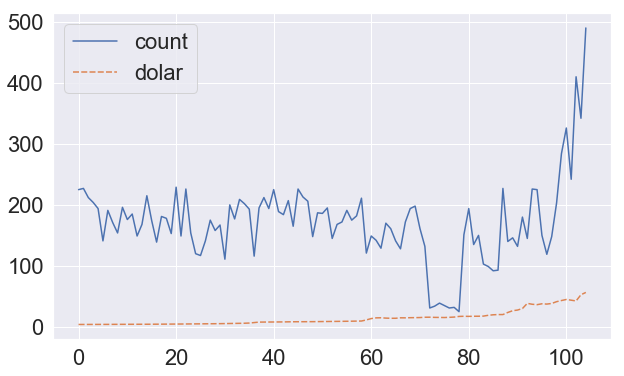

In [552]:
# Ver a ver si hay algo interesante (NO)
plt.figure(figsize=(10,6))
sns.lineplot(data = filmaciones_mes.drop('mes_año', axis = 1))

#plt.ylim(0,400)

In [576]:
# Ver como la distribución de permisos por categoría
por_tipo = film['Tipo de producción'].value_counts().reset_index()
por_tipo.columns = ['Tipo de Producción', 'Cantidad']

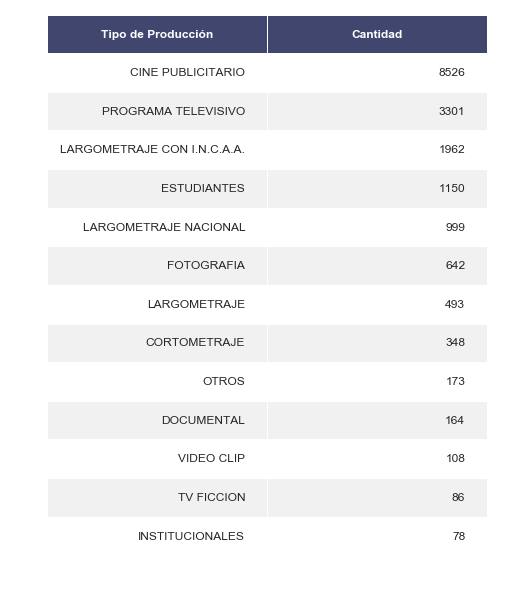

In [646]:
render_mpl_table(por_tipo, col_width= 3.8, font_size= 12)
plt.tight_layout()
plt.savefig('./imagenes/por_tipo.png', dpi= 300)

In [244]:
# Ver que dirección tiene mayor cantidad de permisos totales
film.direccion_.value_counts()[0:20]

BARZANA 1515                              83
LLERENA 2437                              76
TRONADOR 671                              74
CASTILLO 1709                             64
CHORROARIN AV. 1002                       64
ORONO, NICASIO 1235                       61
GIRIBONE 1664                             58
VOLTAIRE 5980                             58
SUPERI 1885                               57
MARTINEZ, ENRIQUE, GRAL. 2037             53
TRES SARGENTOS 370                        51
CRUCERO GRAL. BELGRANO 1201               46
ZAPIOLA 334                               46
DUMONT, SANTOS 2724                       45
WARNES AV. 1396                           45
CASTILLO, CATULO 2750                     42
SUPERI 1367                               42
REPUBLICA BOLIVARIANA DE VENEZUELA 850    41
TORRENT 1141                              38
VIALE, LUIS 2643                          38
Name: direccion_, dtype: int64

In [643]:
direc = film['direccion_'].value_counts()[0:10].reset_index()
direc.columns = ['Dirección', 'N° de filmaciones']

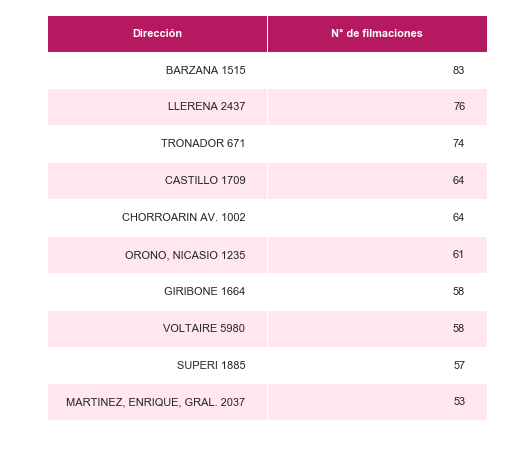

In [647]:
render_mpl_table(direc, col_width= 3.8, font_size= 11, header_color='#b5195f', row_colors= ['#ffe6f1', 'w'])
plt.tight_layout()
plt.savefig('./imagenes/direccion_tot.png', dpi= 300)

_____________ 
IMAGEN GMAPS
______________

In [245]:
# ver cuantas cosas diferentes se filmaron en el lugar que más se filmó
film.loc[film.direccion_ == 'BARZANA 1515'].titulo.nunique()

16

In [247]:
# generar un nuevo df con el conteo de filmaciones por direccion
direcciones = film.direccion_.value_counts().reset_index()
direcciones.columns = ['direccion', 'num']

In [251]:
# sacar aquellas direcciones que tienen menos de 16 filmaciones (nunca van a superar en nunique)
direcciones = direcciones.loc[direcciones['num'] >= 16]

In [259]:
# Generar una lista que contenga para cada dirección la cantidad de titulos únicos (es decir cantidad de productos diferentes que se filmaron)
cant= []
for index, elem in direcciones.iterrows():
    cant.append(film.loc[film.direccion_ == elem['direccion']].titulo.nunique())
    

In [261]:
# agregar la lista generada como columna al df direcciones
direcciones['unica'] = cant

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [612]:
# Reorganizar por número de títulos únicos
direcciones.sort_values('unica', ascending= False, inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [615]:
# Cambiar nombre columnas
direcciones.columns = ['direccion', 'num', 'prod_unica']

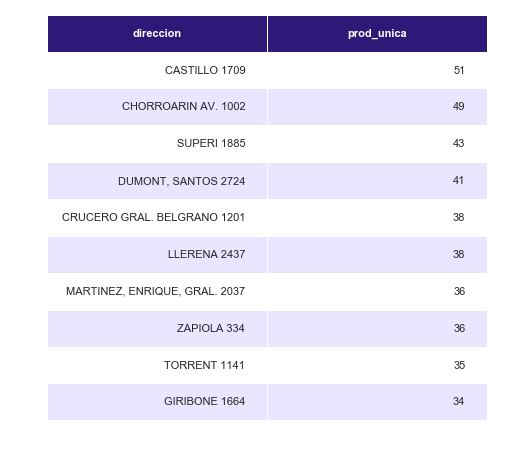

In [648]:
render_mpl_table(direcciones[['direccion', 'prod_unica']][0:10], col_width= 3.8, 
                 font_size= 11, header_color='#2c1978', row_colors= ['#ebe6ff', 'w'])
plt.tight_layout()
plt.savefig('./imagenes/direccion_uniq.png', dpi= 300)

____________________
IMAGEN GMAPS PRIMERA
___________________

In [624]:
# Calcular permisos cedidos por titulo
por_titulo = film.titulo.value_counts().reset_index()
por_titulo.columns = ['Título', 'Cantidad']

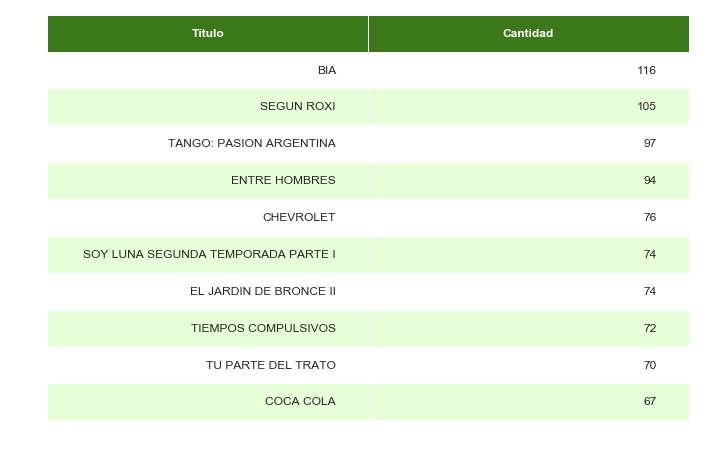

In [649]:
render_mpl_table(por_titulo[0:10], col_width= 5.2, font_size= 12,
                header_color='#3c7819', row_colors= ['#e7ffd9', 'w'])
plt.tight_layout()
plt.savefig('./imagenes/por_titulo.png', dpi= 300)

In [638]:
# Calcular permisos cedidos por razon social
por_raz_soc = film.razon_social.value_counts().reset_index()
por_raz_soc.columns = ['Razón social', 'Cantidad']

In [637]:
#corregir cosas de razón social
film.replace('POL-KA PRODUCCIONES SA', 'POL-KA PRODUCCIONES S.A.', inplace= True)
film.replace('LANDIA SRL', 'LANDIA S.R.L.', inplace= True)


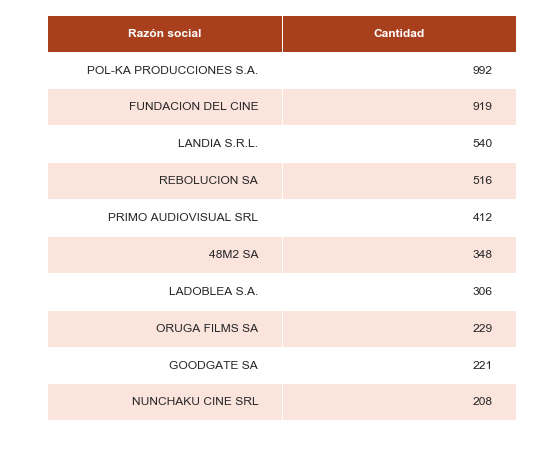

In [650]:
render_mpl_table(por_raz_soc[0:10], col_width= 4, font_size= 12,
                header_color='#a8401d', row_colors= ['#fae4dc', 'w'])
plt.tight_layout()
plt.savefig('./imagenes/por_raz_soc.png', dpi= 300)

# Generación y modificación dataframes para geodataframes y mapas

In [51]:
# Reemplazar un error con nuñez
film.replace('NU\\U00F1EZ', 'NUÑEZ', inplace= True)

csv y shapefile con los poligonos de CABA https://data.buenosaires.gob.ar/dataset/barrios

In [273]:
#Generar geodataframe a parir de csv (el shapefile tiene las coordenadas mal)
mapa = gpd.read_file('./barrios_shape/barrios.csv')

In [279]:
mapa.tail(5)

,WKT,barrio,comuna,perimetro,area,geometry
43,"POLYGON ((-58.4505669109009 -34.5356104340406,...",BELGRANO,13,20609.7753969,7999239.81384,"POLYGON ((-58.45057 -34.53561, -58.45066 -34.5..."
44,"POLYGON ((-58.3800038855693 -34.5700235247202,...",RECOLETA,2,21452.8386478,6317264.56056,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
45,"POLYGON ((-58.3742728981345 -34.5787043103248,...",RETIRO,1,18837.988687,4512710.90703,"POLYGON ((-58.37427 -34.57870, -58.37427 -34.5..."
46,"POLYGON ((-58.4587157782967 -34.5372101050856,...",NUÑEZ,13,10785.2610814,4424199.26509,"POLYGON ((-58.45872 -34.53721, -58.45887 -34.5..."
47,"POLYGON ((-58.3542882851118 -34.6297737886867,...",BOCA,4,20060.0039394,5036240.45441,"POLYGON ((-58.35429 -34.62977, -58.35427 -34.6..."


In [278]:
# Corregir error "NUÑEZ"
mapa.replace('NUÃ‘EZ', 'NUÑEZ', inplace= True)

In [ ]:
# Ver el mapa
#fig, ax = plt.subplots(figsize = (10,10))
#mapuchi.plot(ax= ax)

In [207]:
# Generar el geodataframe a partir del dataframe original de filmaciones para poder plottear después los puntos
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(film['long'], film['lat'])]
film_geo = gpd.GeoDataFrame(film, crs= crs, geometry= geometry)

In [280]:
# Checkear df
#film_geo.head(5)

In [326]:
# Agrupar por barrio y ver cantidad de produccion por tipo para cada uno --> generar nuevo df "barrios"
barrios_cat = pd.DataFrame(film.groupby('barrio')['tipo_produccion'].value_counts())

In [327]:
# Acomodar el df
barrios_cat.reset_index(level=0, inplace= True)

In [328]:
# Acomodar el df
barrios_cat.columns = ['barrio', 'num']

In [329]:
# Acomodar el df
barrios_cat.reset_index(inplace= True)

In [330]:
# Acomodar el df
barrios_cat = barrios_cat[['barrio','tipo_produccion', 'num']]

In [331]:
# Acomodar el df (ordenar por valores de cantidad de produccion por tipo por barrio)
barrios_cat.sort_values(['barrio', 'num'], ascending= False, inplace= True)

In [332]:
# Acomodar el df (quedarse solo con la primer fila por barrio)
barrios_cat.drop_duplicates(subset= 'barrio', keep= 'first', inplace = True)

In [333]:
# Acomodar el df (sacar columna de conteo para quedarme solo con categoría por barrio)
barrios_cat.drop('num', axis= 1, inplace= True)

In [335]:
# Checkear df
#barrios_cat

In [309]:
n_por_barrio = pd.DataFrame(film.barrio.value_counts().reset_index())
n_por_barrio.columns = ['barrio', 'num']

In [311]:
# Checkear df
#n_por_barrio

In [336]:
# mergear para agregar la categoría más numerosa por barrio para cada barrio
mapa = pd.merge(mapa, prueba, how= 'left', on= 'barrio')

In [337]:
# mergear para agregar el numero de filmaciones por barrio
mapa = pd.merge(mapa, n_por_barrio, how= 'left', on= 'barrio')

In [339]:
# Checkear df
#mapa.head()

---------------

# MAPAS

## plottear todos las filmaciones coloreando por categoría

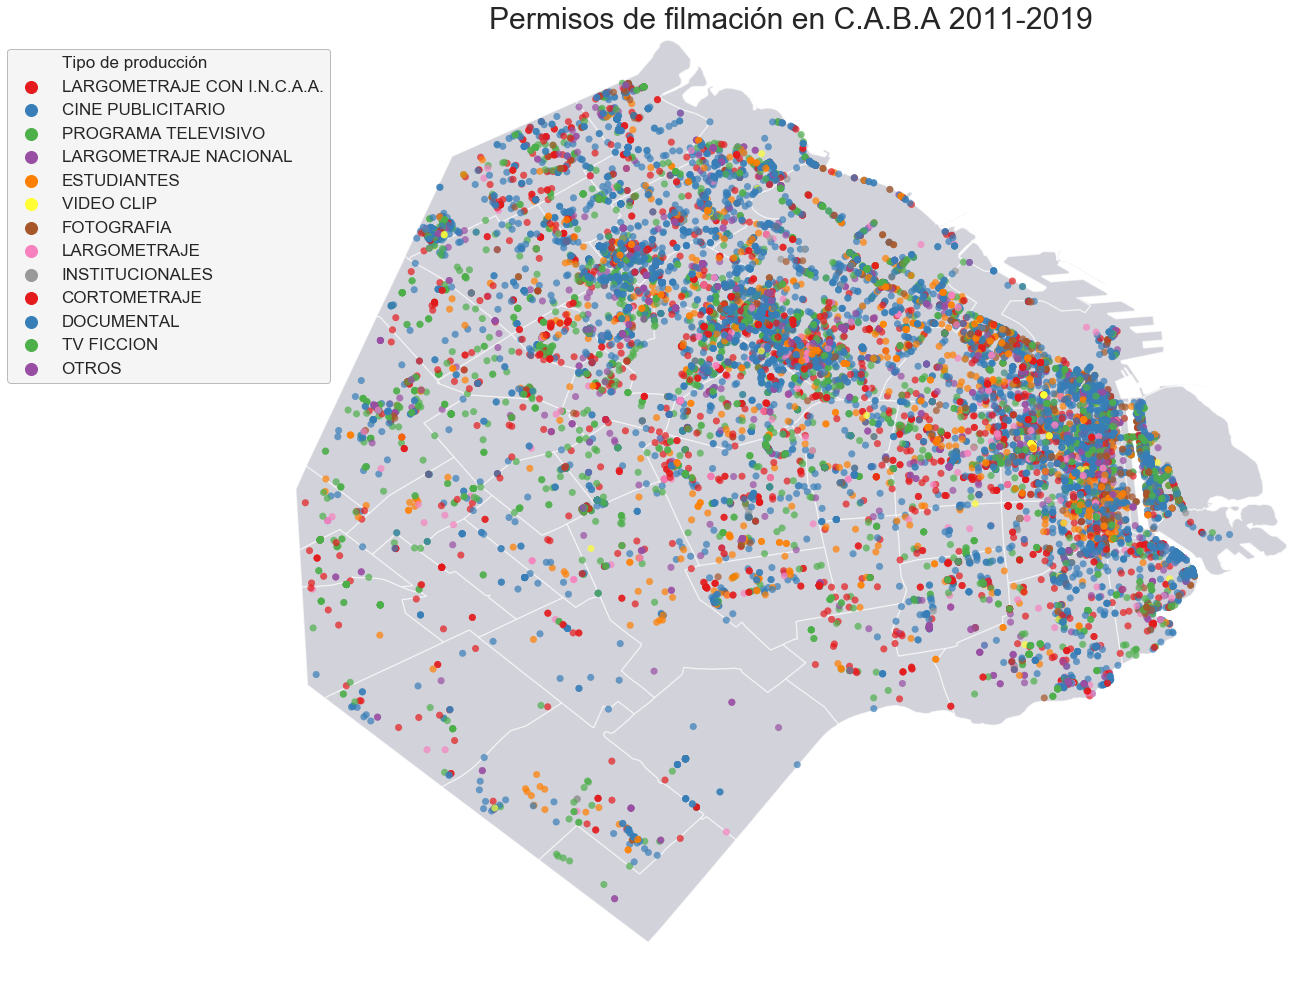

In [651]:
fig, ax= plt.subplots(figsize= (18,16))
#plottear el mapa de base
ax = mapa.plot(ax = ax, edgecolor= 'white', linewidth= 1.25, color= '#b4b5c2', alpha= 0.6, zorder= 0)

# plottear los puntos coloreados por cateogría
ax = sns.scatterplot(x= 'long', y= 'lat',hue= 'Tipo de producción', zorder=1, data= film, alpha= 0.7,s= 50,
                     linewidth = 0, palette= 'Set1',)#palette,size= 18, alpha = 0.7
# propiedades de la leyenda
plt.legend(loc= 'upper left', bbox_to_anchor=(-0.3, 1), fancybox=True, shadow= False, facecolor= '#e6e6e6',
           edgecolor= '#5e5e5e', framealpha= 0.4, title= None, fontsize = 17, markerscale = 2)
# Seteos estéticos
plt.title('Permisos de filmación en C.A.B.A 2011-2019', pad= 12,  fontsize = 30)
plt.margins(0)
plt.axis('off')
plt.tight_layout()

plt.savefig('./imagenes/mapa_todos.png', dpi= 300)

## Plotear cantidad de filmaciones por barrio

In [381]:
# Generar columna con ubicación para la label de cada barrio
mapa["rep"] = mapa["geometry"].representative_point()
# Generar un df copiado para generar geometrías para los puntos donde irán las labels
ma_points = mapa.copy()
ma_points.set_geometry("rep", inplace = True)

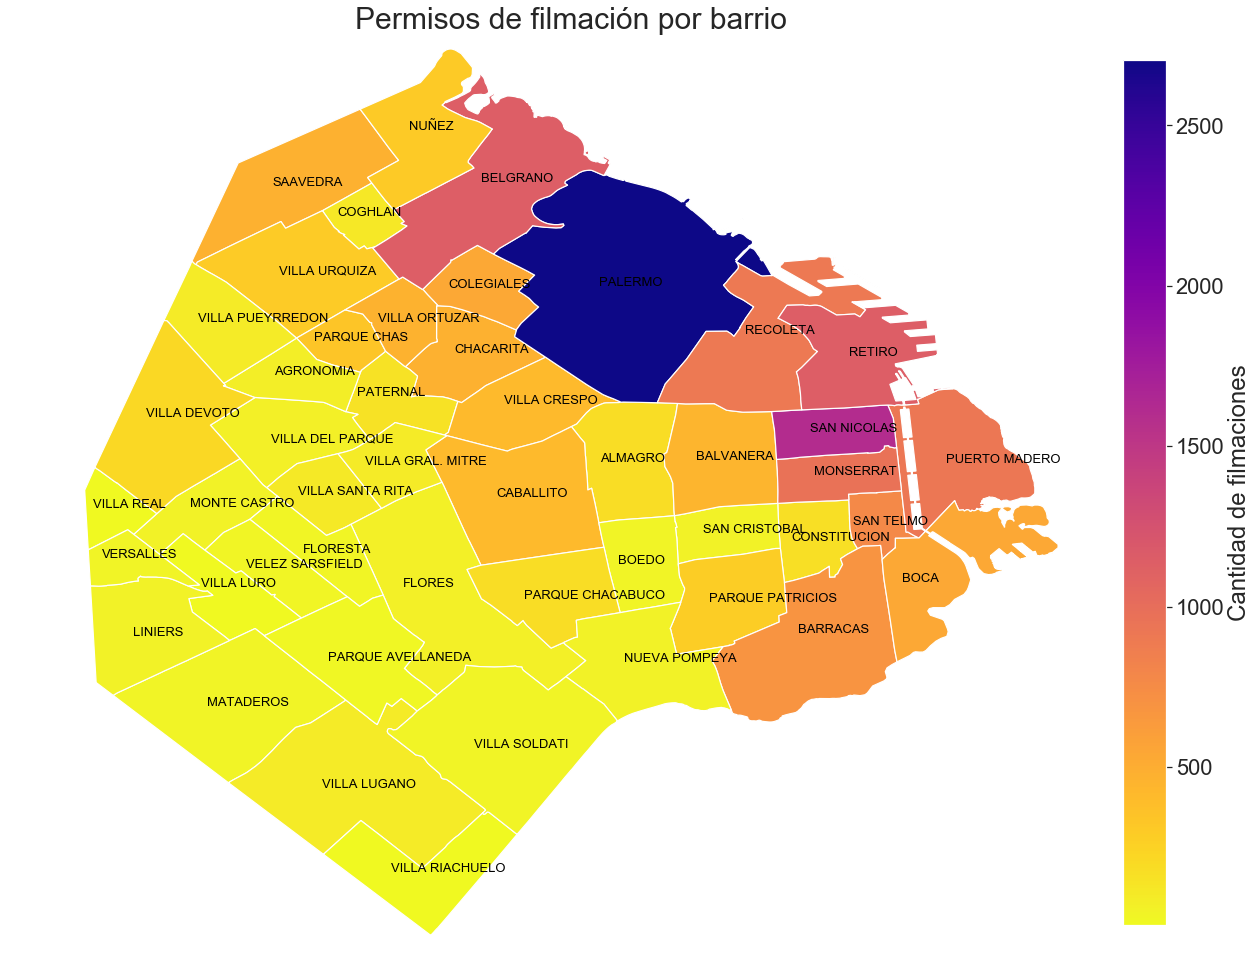

In [652]:
sns.set(font_scale=2)
fig, ax= plt.subplots(figsize= (18,18))
# PLotear el mapa con los barrios coloreados por cantidad de filmaciones
ax = map_cat.plot(ax = ax, edgecolor= 'white', linewidth= 1.2, column= 'num',cmap = 'plasma_r', legend= True,
                 legend_kwds= {'fraction':0.04, 'pad':0.06, 'drawedges': False, 
                               'label':"Cantidad de filmaciones"})

# Poner nombre de cada barrio en cada poligono
for x, y, label in zip(ma_points.geometry.x, ma_points.geometry.y, ma_points["barrio"]):
    plt.text(x - 0.005, y, label, fontsize = 13, color= 'black')

plt.title('Permisos de filmación por barrio', pad= 20,  fontsize = 30)
plt.margins(0)
plt.axis('off')
plt.tight_layout()


plt.savefig('./imagenes/mapa_por_barrio.png', dpi= 300)

## Categoría más filmada por barrio

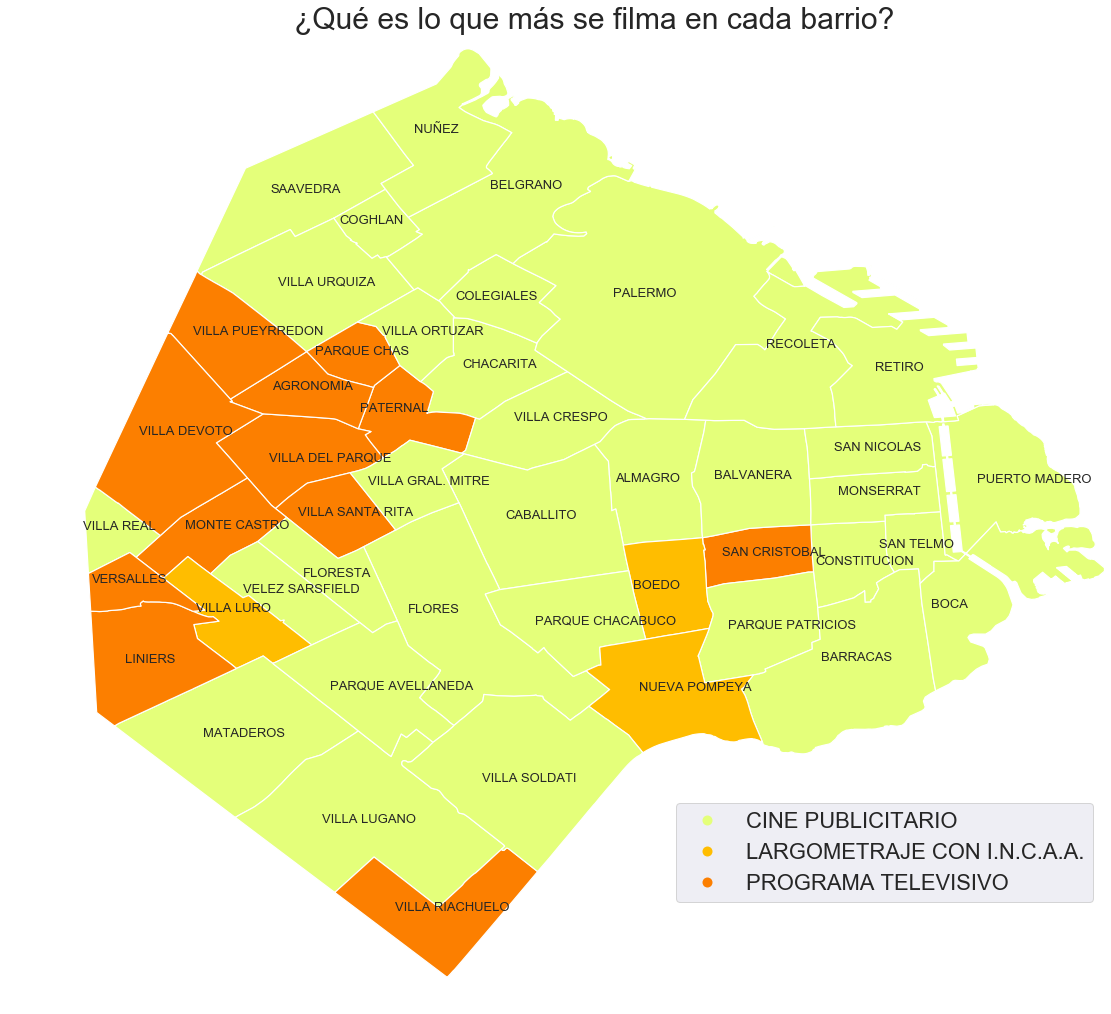

In [653]:
fig, ax= plt.subplots(figsize= (16,16))
#plotear el mapa con color diferente por categoría mayoritaria
ax = map_cat.plot(ax = ax, edgecolor= 'white', linewidth= 1.2, column= 'tipo_produccion', legend= True, cmap = 'Wistia')


for x, y, label in zip(ma_points.geometry.x, ma_points.geometry.y, ma_points["barrio"]):
    plt.text(x - 0.007, y, label, fontsize = 13)

# modificar ubicación leyenda    
leg = ax.get_legend()
leg.set_bbox_to_anchor((1,0.2,0,0))

    
plt.title('¿Qué es lo que más se filma en cada barrio?', pad= 20,  fontsize = 30)
plt.margins(0)
plt.axis('off')
plt.tight_layout()


plt.savefig('./imagenes/mapa_por_cat.png', dpi= 300)

## Heatmap

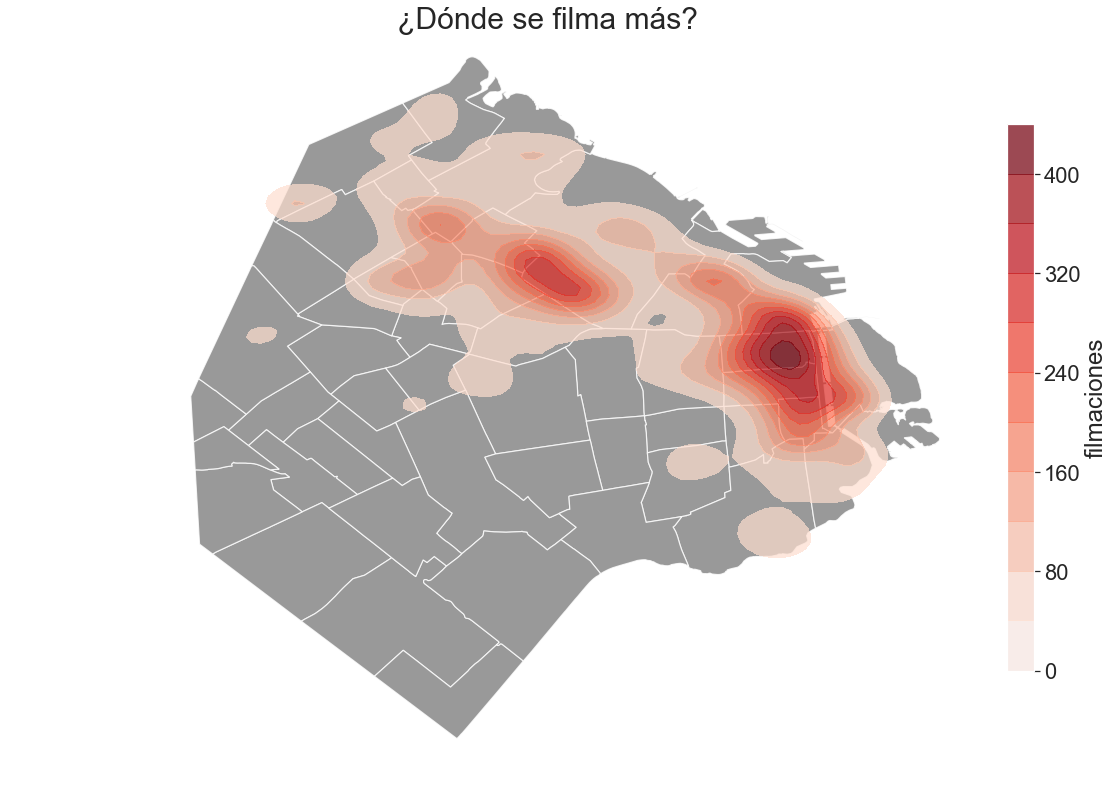

In [654]:
fig, ax= plt.subplots(figsize= (16,16))
#Mapa base
mapa.plot(ax = ax, edgecolor= 'white', linewidth= 1.2, color= 'gray', alpha= 0.8, zorder= 0)

#kde en 2D
ax= sns.kdeplot(data= film['long'], data2= film['lat'], shade= True, shade_lowest= False, 
                cmap= 'Reds', cbar= True, cbar_kws= {'fraction':0.03, 'pad':0.04, 'drawedges': False, 'label':"filmaciones"},
                zorder= 1, alpha= 0.7)

plt.title('¿Dónde se filma más?', pad= 20,  fontsize = 30)
plt.margins(0)
plt.axis('off')
plt.tight_layout()


plt.savefig('./imagenes/heatmap.png', dpi= 300)